Part 1: Creating the GitHub Repo

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
  
# Fetching the dataset 
automobile = fetch_ucirepo(id=10)

In [4]:
# Overview of the entire automobile dataset
automobile.data.features

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


Part 2: Performing Initial EDA, Data Wrangling and Pre-Processing 

In [5]:
print("\nSample of the Dataset:")
automobile.data.features.sample(5)

# More to come.


Sample of the Dataset:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
173,8948.0,34,29,4200.0,92.0,8.7,3.54,3.31,mpfi,122,...,175.6,102.4,front,fwd,sedan,4.0,std,gas,toyota,65.0
194,12940.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,104.3,front,rwd,sedan,4.0,std,gas,volvo,103.0
168,9639.0,30,24,4800.0,116.0,9.3,3.50,3.62,mpfi,146,...,176.2,98.4,front,rwd,hardtop,2.0,std,gas,toyota,134.0
49,36000.0,17,13,5000.0,262.0,11.5,2.76,3.54,mpfi,326,...,191.7,102.0,front,rwd,sedan,2.0,std,gas,jaguar,NaN
103,13499.0,25,19,5200.0,152.0,9.0,3.27,3.43,mpfi,181,...,184.6,100.4,front,fwd,sedan,4.0,std,gas,nissan,108.0


In [6]:
# Check data types and missing values

print("\nData Types:")
automobile.data.features.dtypes


Data Types:


price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object

In [7]:
# Checking the missing values as listed on the UCI website

print("\nMissing Values:")
automobile.data.features.isnull().sum()


Missing Values:


price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [8]:
# Summary statistics

print("\nSummary Statistics:")
automobile.data.features.describe(include='all')


Summary Statistics:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205,205.000000,...,205.000000,205.000000,205,205,205,203.000000,205,205,205,164.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,NaN,2,3,5,NaN,2,2,22,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mpfi,NaN,...,NaN,NaN,front,fwd,sedan,NaN,std,gas,toyota,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,...,NaN,NaN,202,120,96,NaN,168,185,32,NaN
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,NaN,126.907317,...,174.049268,98.756585,NaN,NaN,NaN,3.123153,NaN,NaN,NaN,122.000000
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,NaN,41.642693,...,12.337289,6.021776,NaN,NaN,NaN,0.994841,NaN,NaN,NaN,35.442168
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,NaN,61.000000,...,141.100000,86.600000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,65.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,NaN,97.000000,...,166.300000,94.500000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,NaN,120.000000,...,173.200000,97.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,115.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,NaN,141.000000,...,183.100000,102.400000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,150.000000


In [10]:
print("\nUnique Values in the Columns:")
categorical_columns = automobile.variables[automobile.variables['type'] == 'Categorical']['name'].tolist()
for column in categorical_columns:
    print(column, ":")
    print(automobile.data.features[column].value_counts())
    print("\n")


Unique Values in the Columns:
fuel-system :
fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


engine-type :
engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


drive-wheels :
drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


body-style :
body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


make :
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1

/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


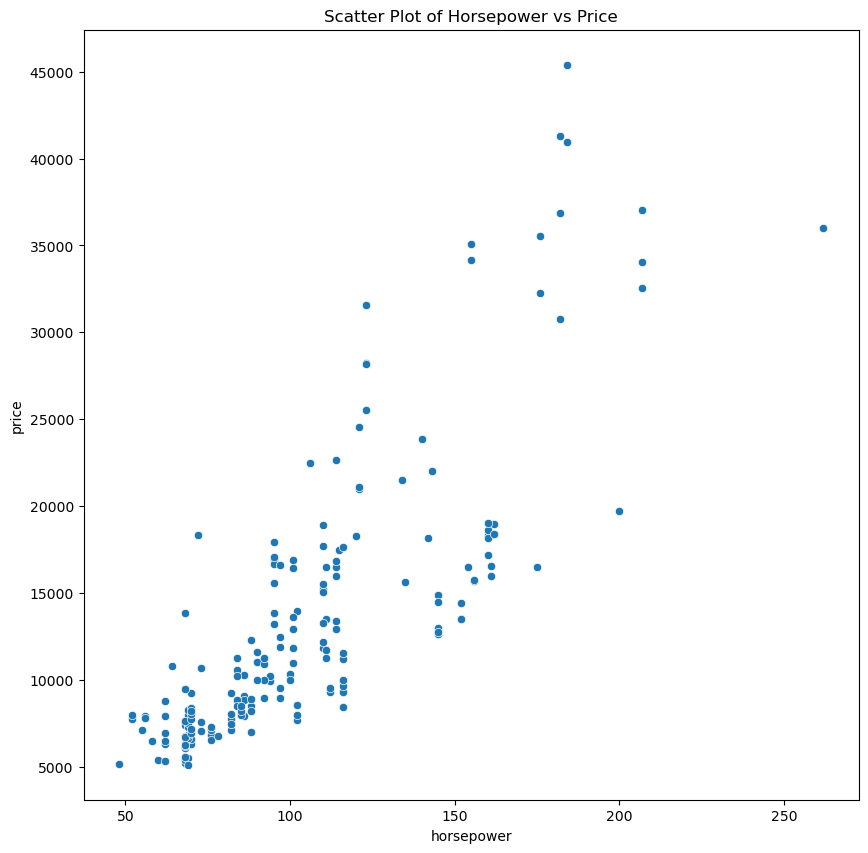

In [11]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=automobile.data.features['horsepower'], y=automobile.data.features['price'])
plt.title('Scatter Plot of Horsepower vs Price')
plt.show()

In [12]:
# Handle missing values
# Replacing missing values in 'normalized-losses' with the mean (122.0)
automobile.data.features.loc[:, 'normalized-losses'] = automobile.data.features['normalized-losses'].fillna(automobile.data.features['normalized-losses'].mean())

In [18]:
automobile.data.features['normalized-losses'].mean()


122.0

In [15]:
#Prints the first 10 rows of the dataset 
automobile.data.features.head(10)

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,122.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,177.3,99.8,front,fwd,sedan,2.0,std,gas,audi,122.0
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,wagon,4.0,std,gas,audi,122.0
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,192.7,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,178.2,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,122.0


In [113]:
automobile.data.features.isna().sum()

price                4
highway-mpg          0
city-mpg             0
peak-rpm             2
horsepower           2
compression-ratio    0
stroke               4
bore                 4
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         2
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
dtype: int64

In [119]:
#Drops the null values
automobile.data.features.dropna()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,122.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


In [114]:
#Displays the hisotgram of the height column
# sns.histplot(data=automobile.data.features, x="height", kde=True, color="teal")

/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

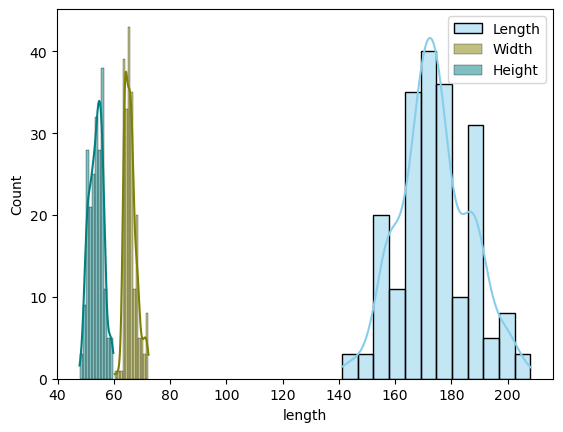

In [121]:
sns.histplot(data=automobile.data.features, x="length", kde=True, color="skyblue", label="Length")
sns.histplot(data=automobile.data.features, x="width", kde=True, color="olive", label="Width")
sns.histplot(data=automobile.data.features, x="height", kde=True, color="teal", label="Height")

plt.legend() 
plt.show()

/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='curb-weight', ylabel='Count'>

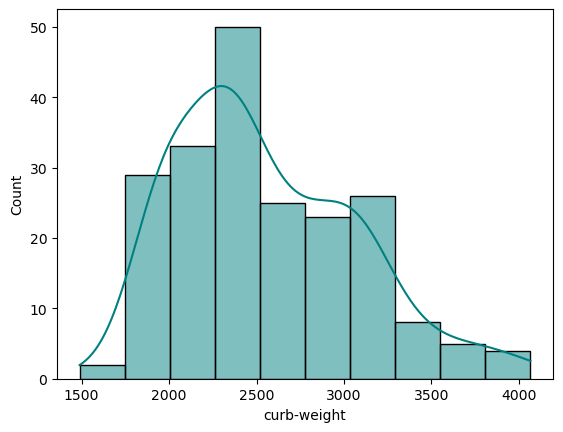

In [120]:
#Displays the hisotgram of the curb-weight column
sns.histplot(data=automobile.data.features, x="curb-weight", kde=True, color="teal")

In [117]:
#Value counts of the engine-type column
engine_value_counts = automobile.data.features.value_counts("engine-type")

/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

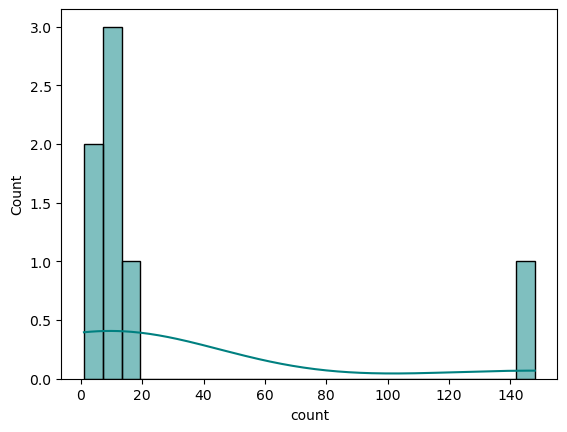

In [126]:
#Displays the histogram of the engine-type column
sns.histplot(data=engine_value_counts, kde=True, color="teal")

/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pcordero/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num-of-cylinders', ylabel='Count'>

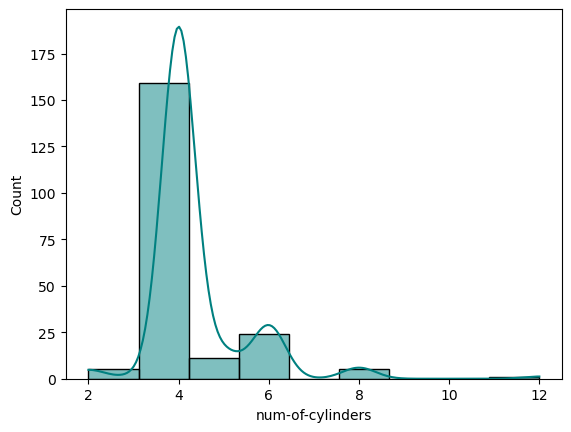

In [129]:
#Displays the histogram of the num-of-cylinder column
sns.histplot(data=automobile.data.features, x="num-of-cylinders", kde=True, color="teal")